# Python time series forecast using prophet

In [2]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"

df = pd.read_csv(url)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365)

future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206428,7.496058,8.918163
3266,2017-01-16,8.531431,7.815391,9.291936
3267,2017-01-17,8.318846,7.596974,9.036707
3268,2017-01-18,8.151448,7.471564,8.903671
3269,2017-01-19,8.163386,7.447908,8.912940


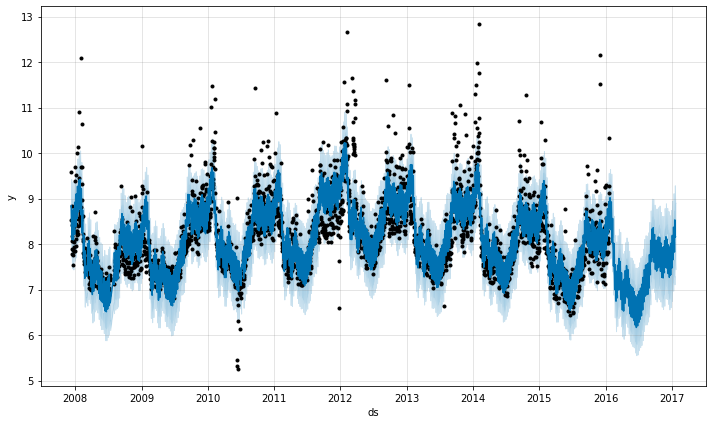

In [10]:
fig1 = m.plot(forecast)


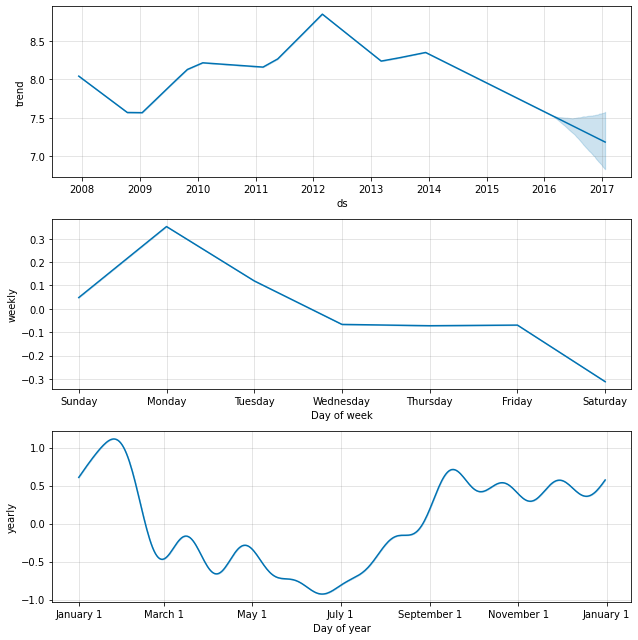

In [11]:
fig2 = m.plot_components(forecast)

## Forecast monthly data

In [3]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv"
    

df = pd.read_csv(url)
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods = 120, freq = 'MS')
# Note that MS used here is month-start, meaning the data point is placed on the start of each month
# ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

future.tail()

,ds
408,2026-01-01
409,2026-02-01
410,2026-03-01
411,2026-04-01
412,2026-05-01


In [6]:
fcst = m.predict(future)


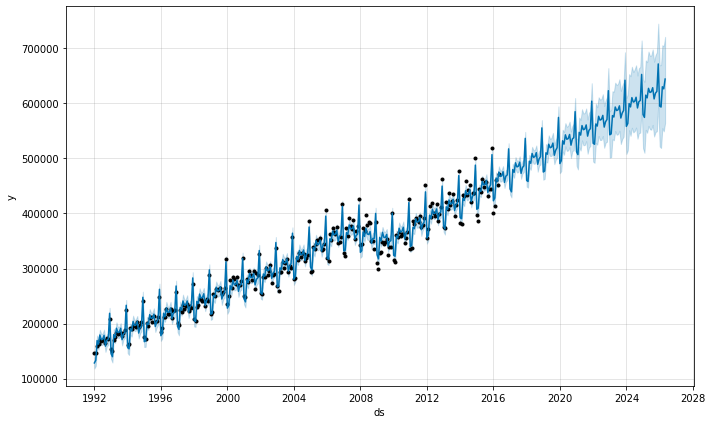

In [8]:
fig = m.plot(fcst)

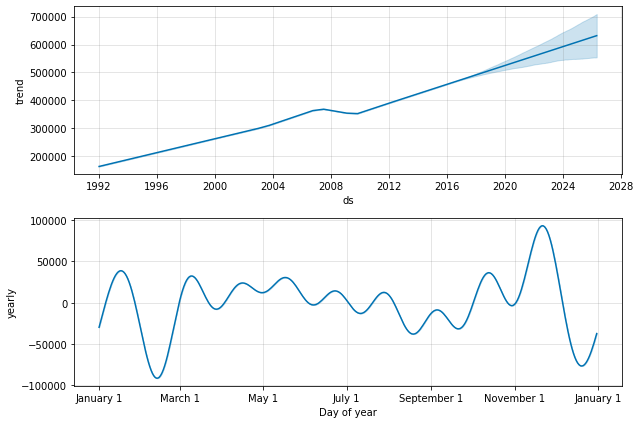

In [9]:
fig2 = m.plot_components(fcst)